In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
credit = pd.read_excel('default of credit card clients.xls', header=1)
credit.head()
credit.drop('ID', axis=1, inplace=True)

In [4]:
credit.shape

(30000, 24)

In [5]:
credit.rename(columns={'LIMIT_BAL': 'CREDIT_LIMIT', 'default payment next month': 'default'}, inplace=True)
credit.info

<bound method DataFrame.info of        CREDIT_LIMIT  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0             20000    2          2         1   24      2      2     -1   
1            120000    2          2         2   26     -1      2      0   
2             90000    2          2         2   34      0      0      0   
3             50000    2          2         1   37      0      0      0   
4             50000    1          2         1   57     -1      0     -1   
...             ...  ...        ...       ...  ...    ...    ...    ...   
29995        220000    1          3         1   39      0      0      0   
29996        150000    1          3         2   43     -1     -1     -1   
29997         30000    1          2         2   37      4      3      2   
29998         80000    1          3         1   41      1     -1      0   
29999         50000    1          2         1   46      0      0      0   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_A

In [6]:
missing_values = pd.concat([credit.isnull().sum(), 100 * credit.isnull().mean()], axis=1)
missing_values.rename(columns={0: 'Count', 1: 'Percent'}, inplace=True)
missing_values

,Count,Percent
CREDIT_LIMIT,0,0.0
SEX,0,0.0
EDUCATION,0,0.0
MARRIAGE,0,0.0
AGE,0,0.0
PAY_0,0,0.0
PAY_2,0,0.0
PAY_3,0,0.0
PAY_4,0,0.0
PAY_5,0,0.0


In [7]:
credit.shape
print('The Dataset has {} rows and {} columns.'.format(credit.shape[0], credit.shape[1]))

The Dataset has 30000 rows and 24 columns.


In [8]:
credit.columns

Index(['CREDIT_LIMIT', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [9]:
credit.nunique()

CREDIT_LIMIT       81
SEX                 2
EDUCATION           7
MARRIAGE            4
AGE                56
PAY_0              11
PAY_2              11
PAY_3              11
PAY_4              11
PAY_5              10
PAY_6              10
BILL_AMT1       22723
BILL_AMT2       22346
BILL_AMT3       22026
BILL_AMT4       21548
BILL_AMT5       21010
BILL_AMT6       20604
PAY_AMT1         7943
PAY_AMT2         7899
PAY_AMT3         7518
PAY_AMT4         6937
PAY_AMT5         6897
PAY_AMT6         6939
default             2
dtype: int64

In [10]:
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [11]:
no_ed = credit['EDUCATION'] == 0
grad = credit['EDUCATION'] == 1
under_grad = credit['EDUCATION'] == 2
hs = credit['EDUCATION'] == 3
other = credit['EDUCATION'] >= 4
credit.loc[no_ed, ['EDUCATION']] = 'none'
credit.loc[other, ['EDUCATION']] = 'other'
credit.loc[grad, ['EDUCATION']] = 'graduate'
credit.loc[under_grad, ['EDUCATION']] = 'undergraduate'
credit.loc[hs, ['EDUCATION']] = 'high School'
credit['EDUCATION'].unique()

array(['undergraduate', 'graduate', 'high School', 'other', 'none'],
      dtype=object)

In [12]:
credit['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [13]:
mar_status = credit['MARRIAGE'] == 0
credit.loc[mar_status, 'MARRIAGE'] = 3
married = credit['MARRIAGE'] == 1
single = credit['MARRIAGE'] == 2
unknown_s = credit['MARRIAGE'] == 3
credit.loc[married, ['MARRIAGE']] = 'married'
credit.loc[single, ['MARRIAGE']] = 'single'
credit.loc[unknown_s, ['MARRIAGE']] = 'unknown status'

In [14]:
credit['MARRIAGE'].unique()

array(['married', 'single', 'unknown status'], dtype=object)

In [15]:
credit.loc[credit['SEX'] == 1, ['SEX']] = 'male'
credit.loc[credit['SEX'] == 2, ['SEX']] = 'female'
credit['SEX'].unique()

array(['female', 'male'], dtype=object)

In [16]:
credit['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [17]:
credit.columns

Index(['CREDIT_LIMIT', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

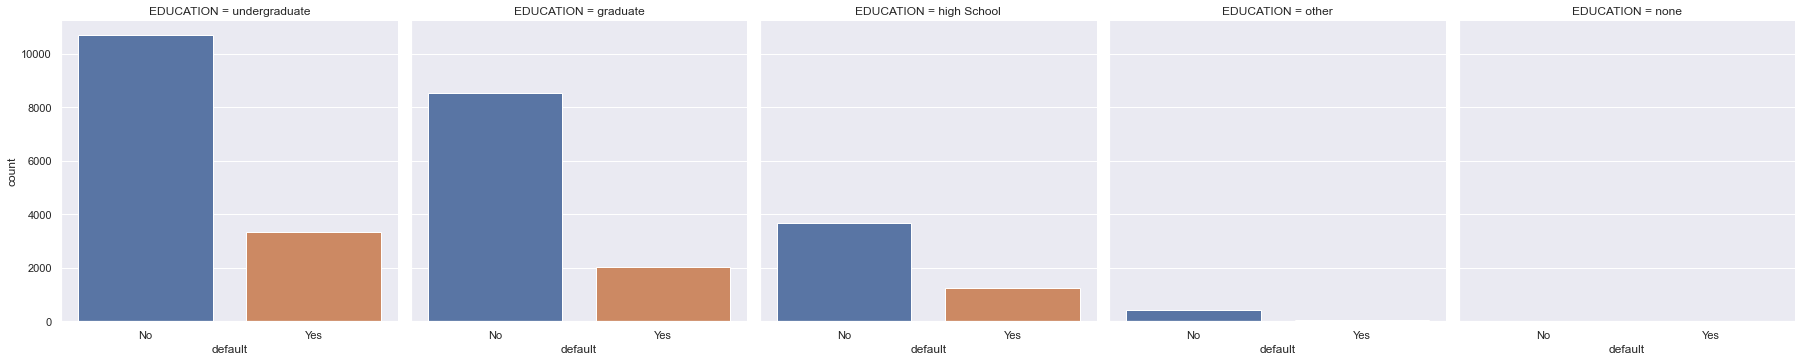

In [18]:
sns.set_theme(style="darkgrid")
ax = sns.catplot(x='default', col='EDUCATION', data=credit, kind="count")
ax.set_xticklabels(['No', 'Yes'])
plt.show()

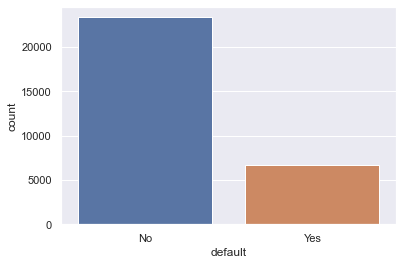

In [19]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='default', data=credit)
ax.set_xticklabels(['No', 'Yes'])
plt.show()

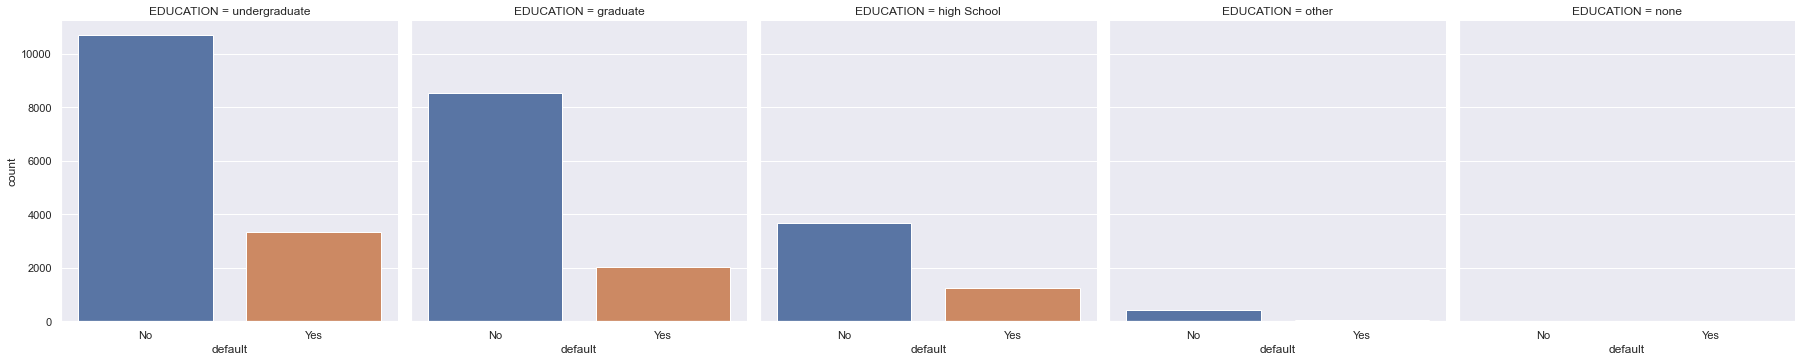

In [20]:
ax = sns.catplot(x='default', col='EDUCATION', data=credit, kind="count")
ax.set_xticklabels(['No', 'Yes'])
plt.show()

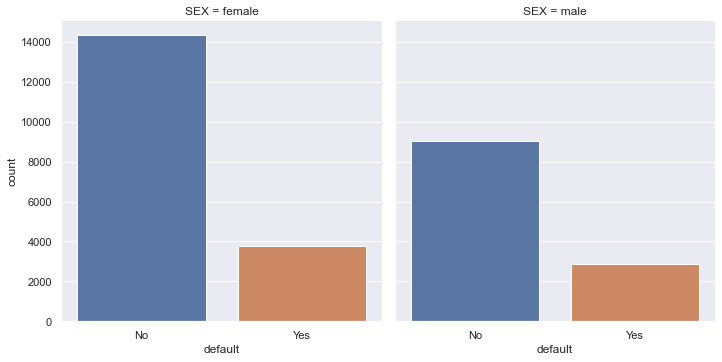

In [21]:
ax = sns.catplot(x='default', col='SEX', data=credit, kind="count")
ax.set_xticklabels(['No', 'Yes'])
plt.show()

In [22]:
default_1_age = credit.loc[credit['default'] == 1, 'AGE']
default_0_age = credit.loc[credit['default'] == 0, 'AGE']

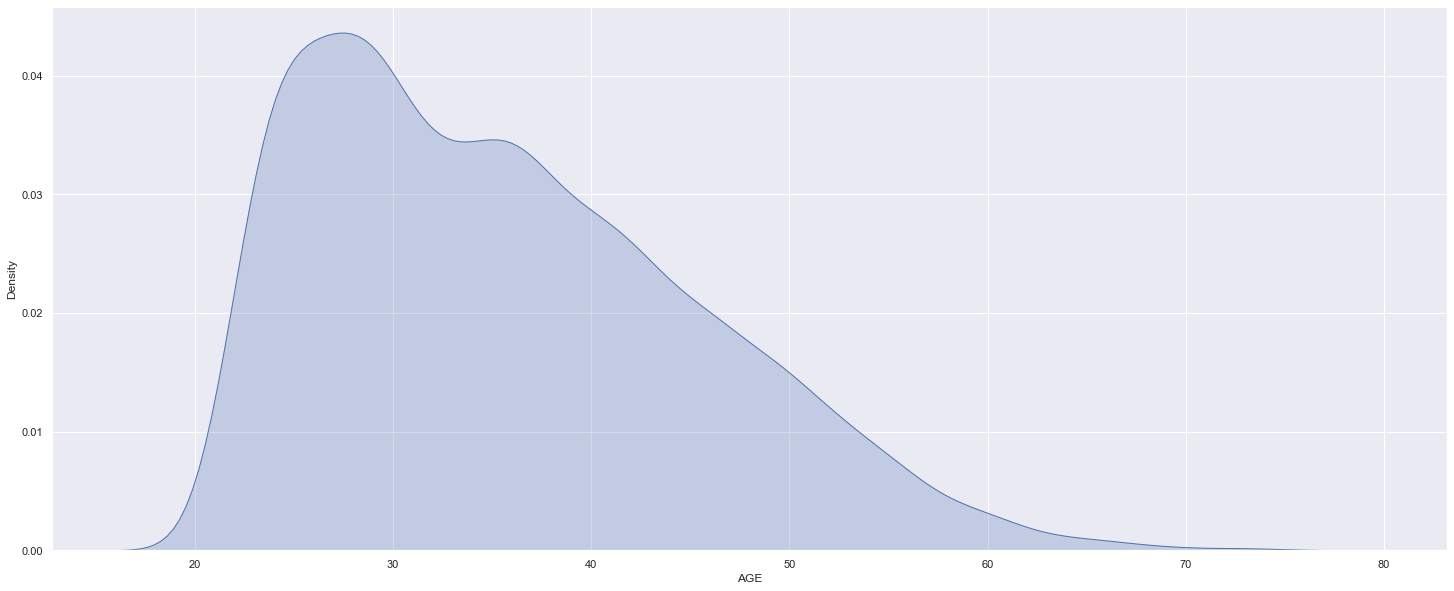

In [23]:
sns.set(rc={'figure.figsize':(25,10)})
sns.kdeplot(default_1_age, shade=True)
plt.show()

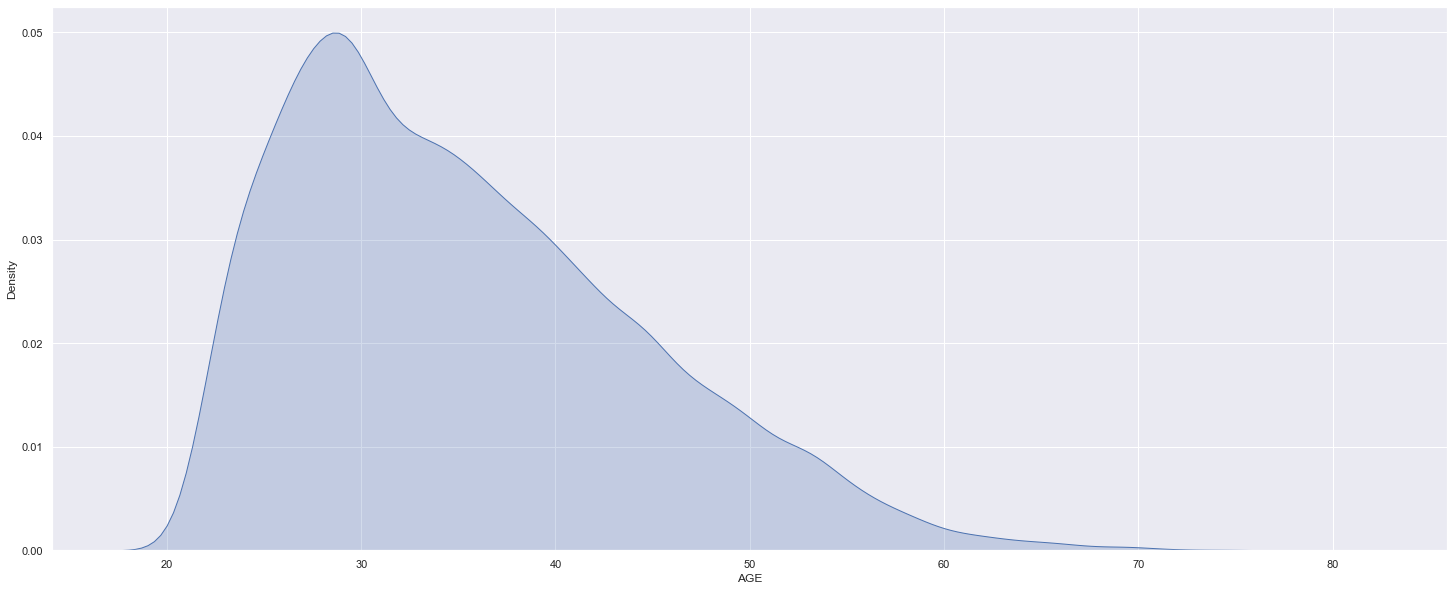

In [24]:
sns.set(rc={'figure.figsize':(25,10)})
sns.kdeplot(default_0_age, shade=True)
plt.show()

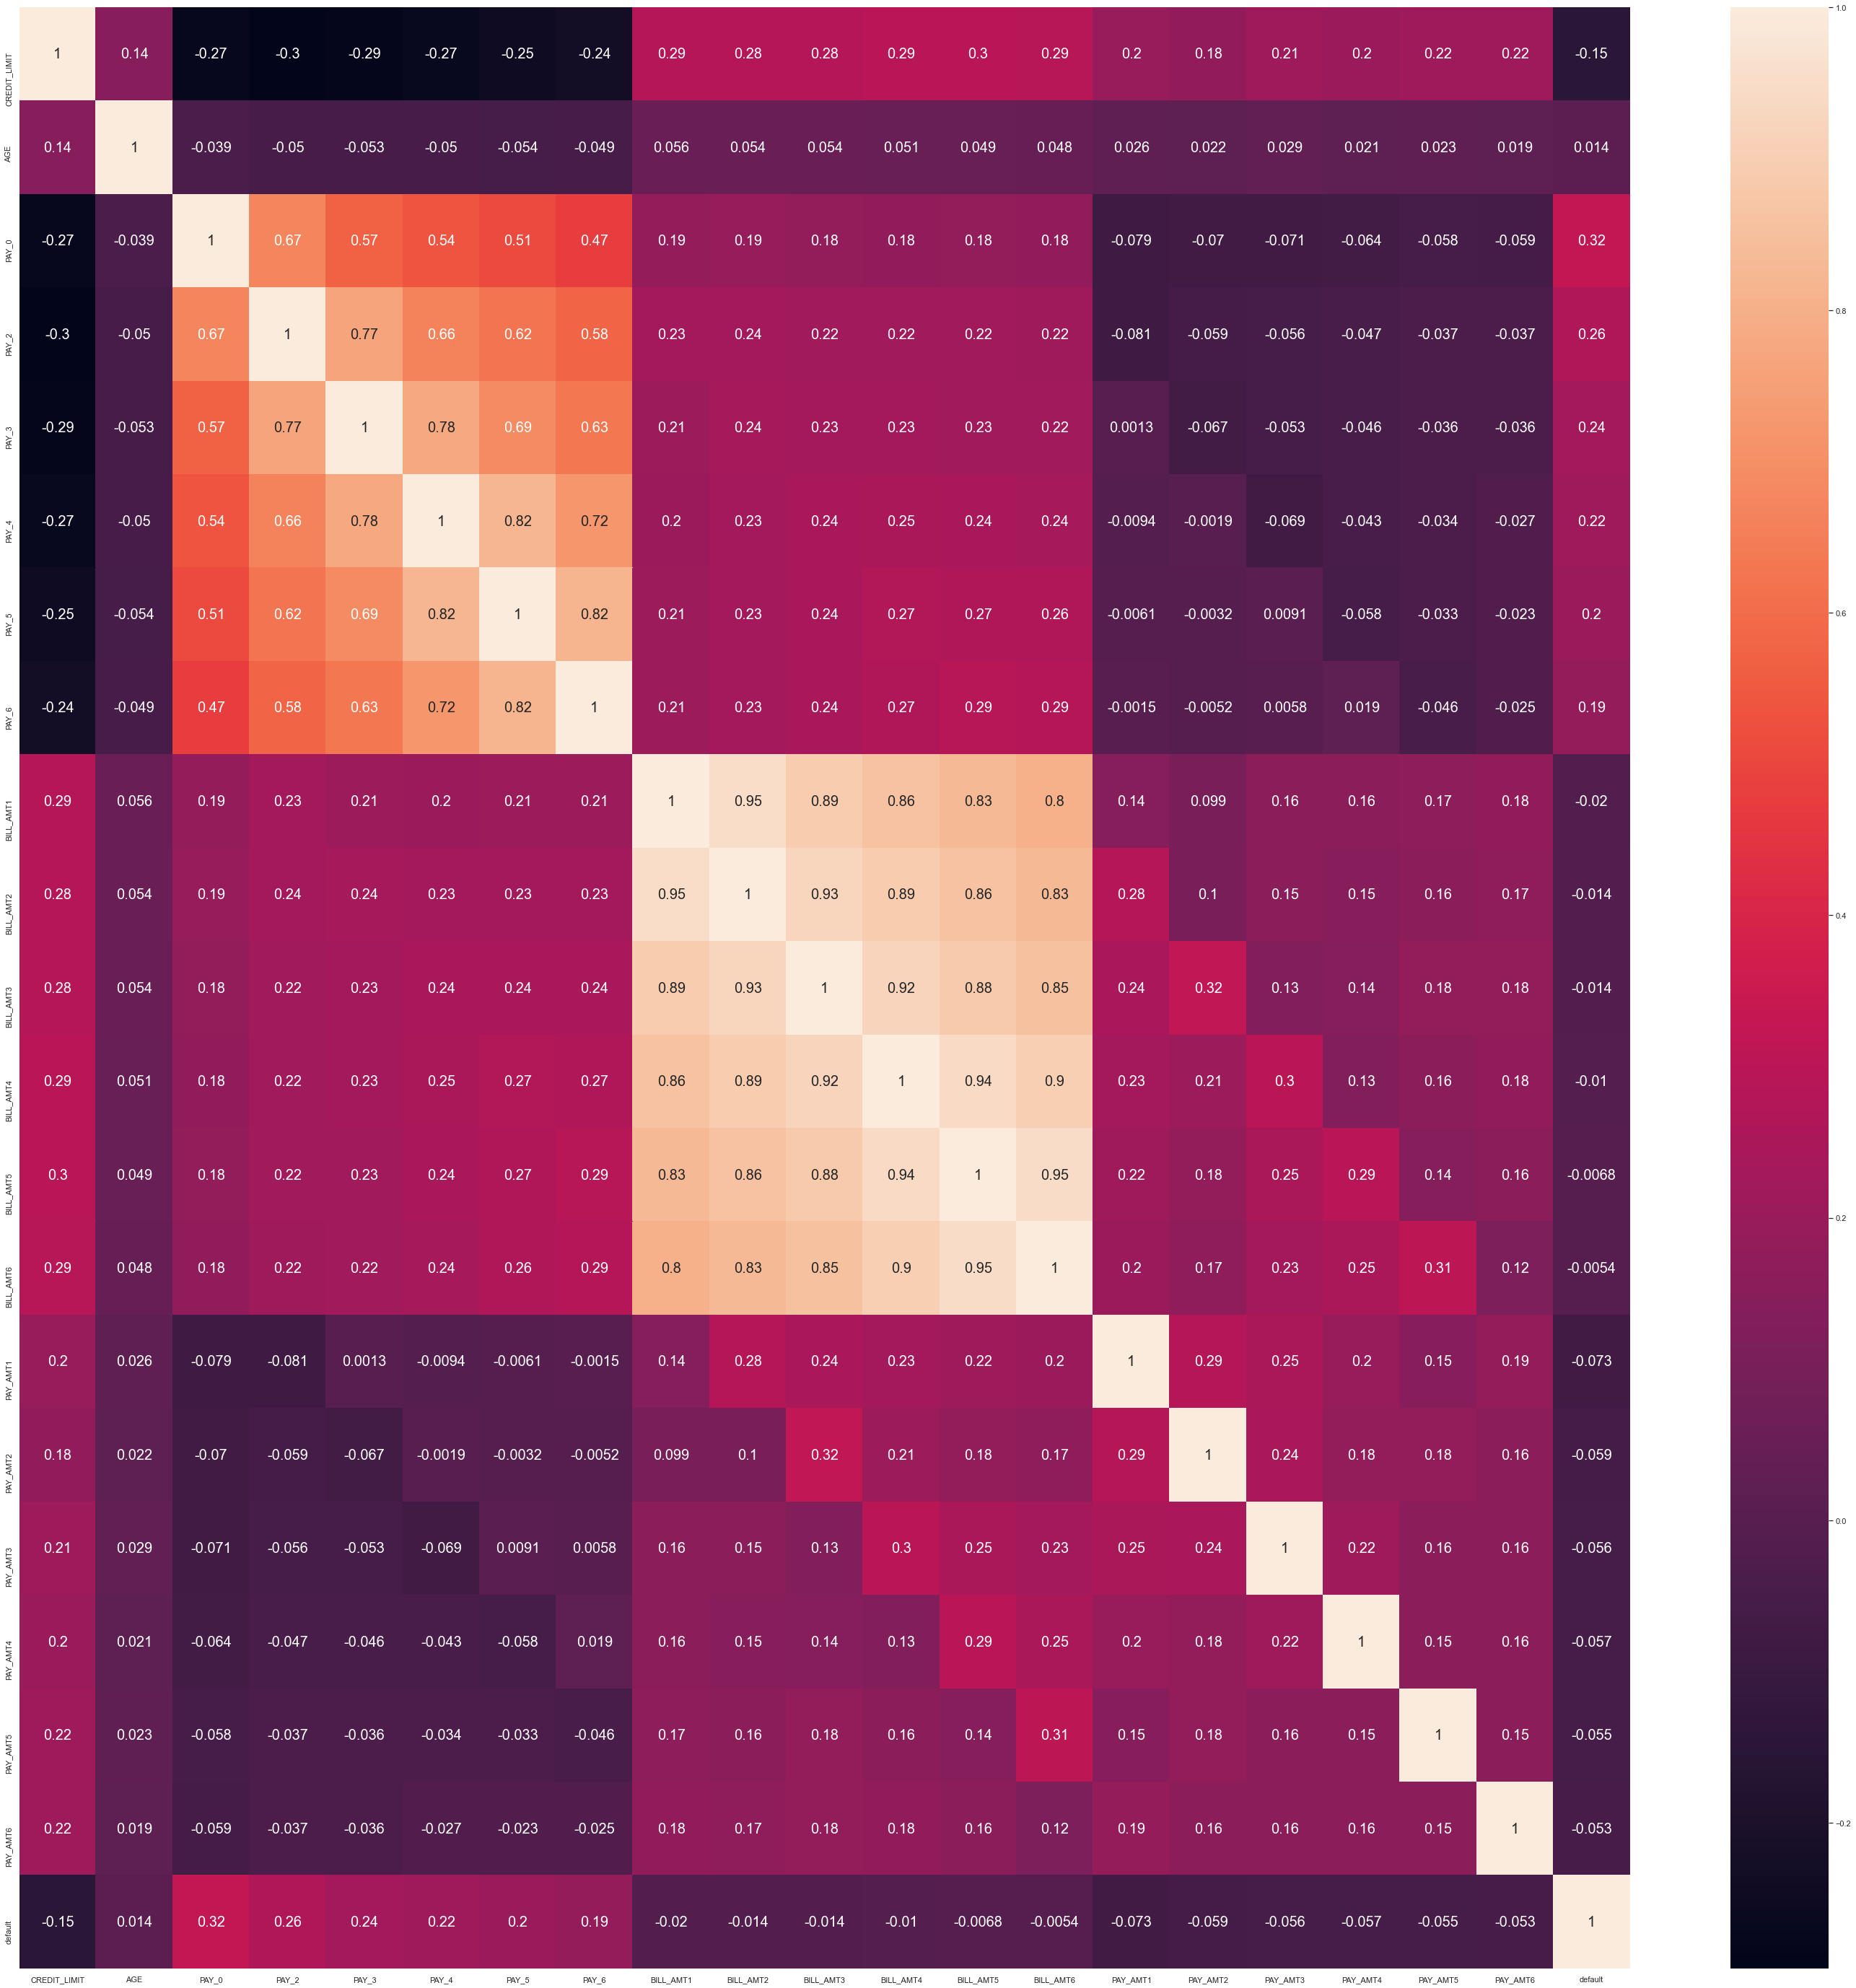

In [25]:
plt.figure(figsize=(50, 50))
sns.heatmap(credit.corr(), annot=True, annot_kws=({'size': 20}))
plt.show()

In [ ]:
from pycaret.classification import *

In [31]:
exp_clf = setup(credit, target = 'default')

,Description,Value
0,session_id,6849
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(30000, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8206,0.0000,0.3628,0.6939,0.4758,0.3803,0.4097,0.0360
lda,Linear Discriminant Analysis,0.8196,0.7692,0.3793,0.6764,0.4855,0.3866,0.4106,0.0850
gbc,Gradient Boosting Classifier,0.8193,0.7869,0.3634,0.6852,0.4744,0.3776,0.4055,1.5580
lightgbm,Light Gradient Boosting Machine,0.8186,0.7834,0.3799,0.6709,0.4845,0.3847,0.4079,0.1740
catboost,CatBoost Classifier,0.8185,0.7846,0.3765,0.6725,0.4822,0.3828,0.4067,1.8330
ada,Ada Boost Classifier,0.8158,0.7783,0.3424,0.6798,0.4547,0.3583,0.3891,0.3880
rf,Random Forest Classifier,0.8148,0.7666,0.3778,0.6529,0.4781,0.3753,0.3963,0.6790
et,Extra Trees Classifier,0.8040,0.7438,0.3744,0.6042,0.4619,0.3502,0.3654,0.5930
lr,Logistic Regression,0.7750,0.6530,0.0000,0.0000,0.0000,-0.0003,-0.0028,0.4480
knn,K Neighbors Classifier,0.7504,0.6088,0.1917,0.3879,0.2564,0.1268,0.1382,0.2290


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=6849,
                solver='auto', tol=0.001)

In [42]:
df_train = credit.sample(frac=.70, random_state=12345).reset_index(drop=True)
df_test = credit.sample(frac=.30, random_state = 98765).reset_index(drop=True)
df_train.shape
df_test.shape

(9000, 24)

In [45]:
exp_clf = setup(df_train, target = 'default')

,Description,Value
0,session_id,4860
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(21000, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [47]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8156,0.7622,0.3282,0.6730,0.4412,0.3462,0.3782
1,0.8184,0.7713,0.3639,0.6685,0.4713,0.3730,0.3981
2,0.8170,0.7773,0.3609,0.6629,0.4673,0.3683,0.3931
3,0.8150,0.7715,0.3517,0.6571,0.4582,0.3587,0.3842
4,0.8204,0.7846,0.3639,0.6800,0.4741,0.3776,0.4044
5,0.8231,0.7828,0.3823,0.6831,0.4902,0.3934,0.4176
6,0.8265,0.7614,0.3884,0.6978,0.4990,0.4042,0.4296
7,0.8163,0.7795,0.3394,0.6727,0.4512,0.3550,0.3850
8,0.8122,0.7802,0.3670,0.6349,0.4651,0.3610,0.3810
9,0.8216,0.7860,0.3497,0.6951,0.4653,0.3720,0.4037


In [50]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8136,0.7594,0.2975,0.6831,0.4145,0.3235,0.3631
1,0.8184,0.7657,0.3486,0.6786,0.4606,0.3647,0.3940
2,0.8197,0.7824,0.3425,0.6914,0.4581,0.3644,0.3968
3,0.8129,0.7646,0.3242,0.6625,0.4353,0.3387,0.3698
4,0.8163,0.7788,0.3333,0.6770,0.4467,0.3515,0.3833
5,0.8190,0.7732,0.3700,0.6685,0.4764,0.3777,0.4019
6,0.8184,0.7501,0.3670,0.6667,0.4734,0.3746,0.3990
7,0.8197,0.7821,0.3303,0.7013,0.4491,0.3576,0.3939
8,0.8082,0.7716,0.3272,0.6331,0.4315,0.3299,0.3559
9,0.8196,0.7898,0.3344,0.6943,0.4513,0.3588,0.3932


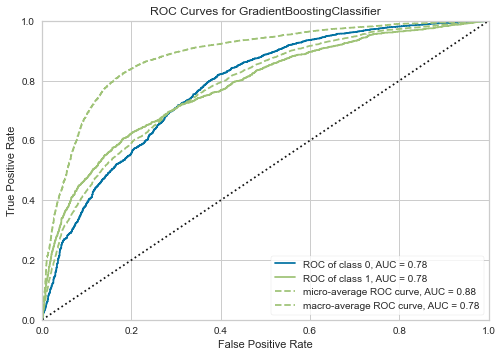

In [51]:
plot_model(tuned_gbc, plot='auc')

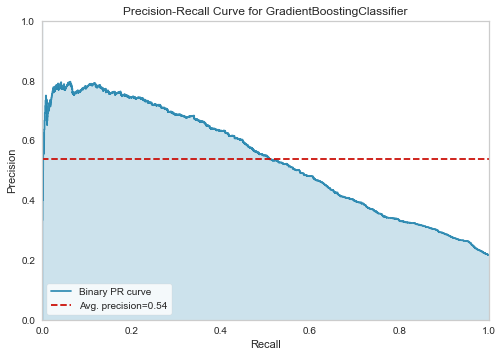

In [52]:
plot_model(tuned_gbc, plot='pr')

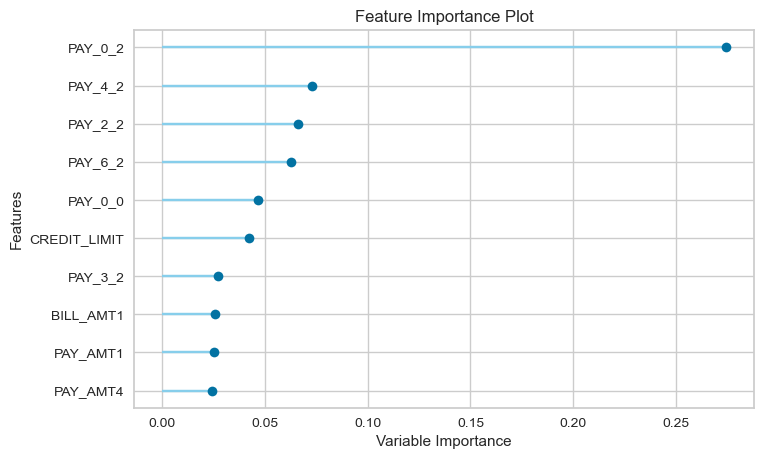

In [54]:
plot_model(tuned_gbc, plot='feature')

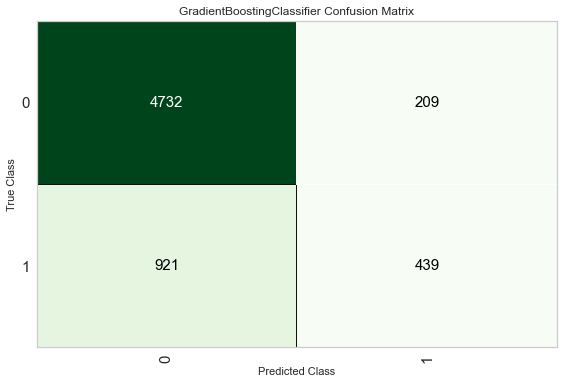

In [55]:
plot_model(tuned_gbc, plot='confusion_matrix')

In [56]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8207,0.7793,0.3228,0.6775,0.4373,0.3462,0.3799


,CREDIT_LIMIT,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,140000.0,31.0,97448.0,70631.0,0.0,0.0,0.0,0.0,1413.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8085
1,120000.0,27.0,11238.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.7681
2,20000.0,26.0,1000.0,8930.0,0.0,0.0,0.0,790.0,8930.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7755
3,150000.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6949
4,20000.0,24.0,3634.0,6568.0,7307.0,8027.0,8892.0,9739.0,3000.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,130000.0,30.0,106796.0,108673.0,104535.0,105349.0,105254.0,120756.0,4000.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9000
6297,20000.0,26.0,20224.0,19210.0,19327.0,20000.0,0.0,0.0,0.0,1500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5586
6298,200000.0,42.0,2753.0,4520.0,7151.0,9641.0,14927.0,17345.0,3006.0,5019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9154
6299,360000.0,28.0,264971.0,257086.0,253407.0,259551.0,265149.0,340930.0,9043.0,8847.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8856


In [57]:
final_gbc = finalize_model(tuned_gbc)

In [58]:
final_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=1,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4860, subsample=0.25, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
test_set = predict_model(final_gbc, data=df_test)

In [60]:
test_set.head()

,CREDIT_LIMIT,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,50000,female,graduate,married,35,0,0,0,0,0,...,462,3000,1200,9,500,462,1500,0,0,0.7749
1,20000,male,high School,single,57,-1,-1,-2,-1,-1,...,930,0,0,19990,390,930,0,0,0,0.7187
2,110000,male,undergraduate,married,30,2,2,2,2,2,...,84021,7300,3800,3000,3100,3000,3000,1,1,0.7644
3,70000,female,undergraduate,single,22,0,0,0,0,0,...,30954,1841,2243,1467,1076,1096,1494,0,0,0.8609
4,290000,female,high School,married,49,0,0,0,-1,-1,...,148003,7600,7521,3804,160897,5198,6000,0,0,0.9323


In [62]:
save_model(final_gbc, 'Credit Default Gradient Boosting Model 27Oct2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                             learning_rate=0.15, loss='deviance',
                                             max_depth=1, max_features='log2',
                                             max_leaf_nodes=None,
                                             mi